# Курсовая работа. Блок ML
<br>

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [31]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

В начале, загрузим датасет и посмотрим на структуру данных, отобразив небольшую его часть.

In [32]:
# загрузка датасета
full_dataset_telecom_users = pd.read_csv('telecom_users.csv')
full_dataset_telecom_users.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Теперь следут посмотреть типы столбцов. Возможно, для дальнейшего анализа, придется некоторые из них поменять.

In [33]:
full_dataset_telecom_users.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Можно отметить, что столбец **TotalCharges** имеет  тип **object**, хотя содержит числовые данные. Для дальнейшего взаимодействия следует перевести его в тип - **float**.



In [34]:
full_dataset_telecom_users['TotalCharges'] = pd.to_numeric(full_dataset_telecom_users['TotalCharges'], errors='coerce')

После того, как все столбцы имеют правильный тип данных, следует оценить есть ли пропущенные значения.

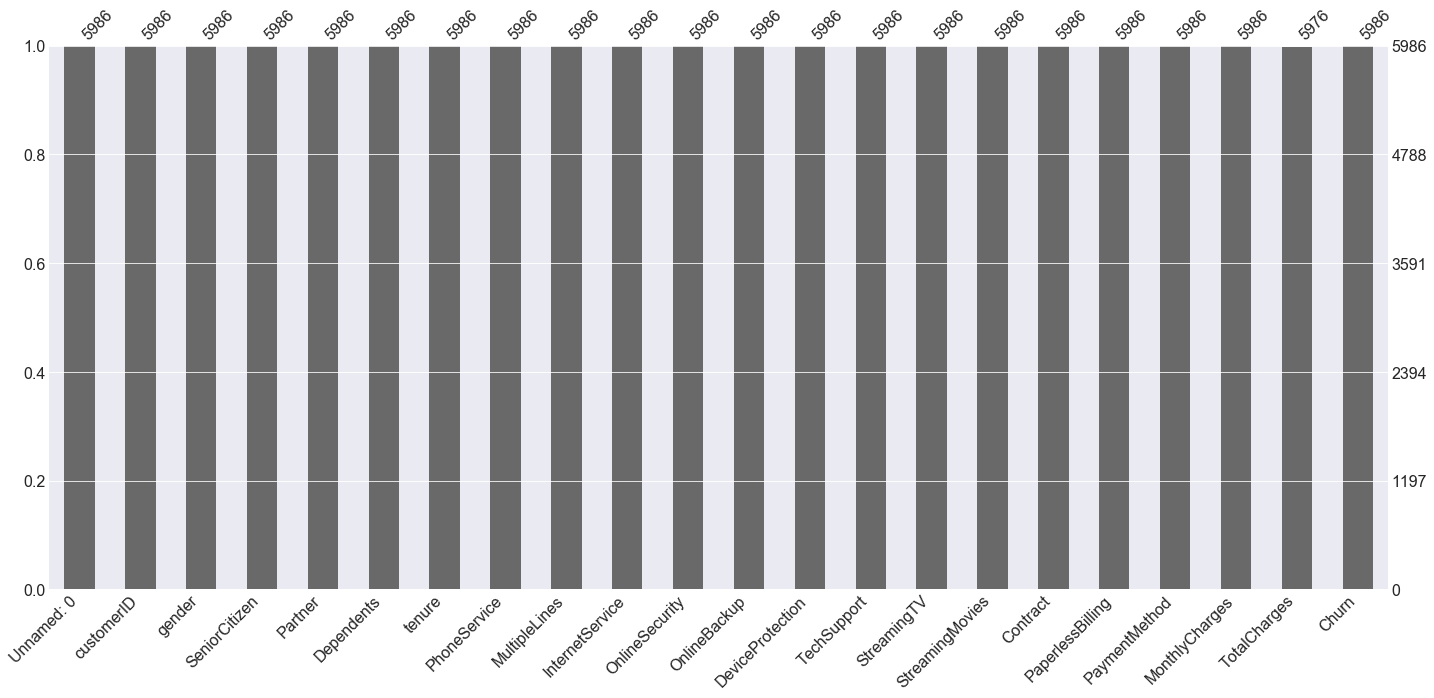

In [35]:
msno.bar(full_dataset_telecom_users)

Из представленных данных видно, что после изменения типа данных столбца **TotalCharges**, нашлись 10 пропусков. Скорее всего, клиент еще не производил оплату за услуги и эту графу оставили пустой. Следует заменить пустые значение на 0.

In [36]:
full_dataset_telecom_users['TotalCharges'] = full_dataset_telecom_users['TotalCharges'].fillna(0)

В датасете имеются два столбца, которые в дальнейшем не будут использоваться - **Unnamed: 0 и customerID**. Будет удобнее их удалить перед дальнейшим анализом датасета.

In [37]:
dataset_telecom_users = full_dataset_telecom_users.drop(['Unnamed: 0', 'customerID'], axis = 1)

Далее приступим к изучению каждого столбца датасета по отдельности и выведем ряд статистик для каждого из них.

In [38]:
dataset_telecom_users.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


In [39]:
dataset_telecom_users.describe(include=[np.object])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


### Первые выводы ознакомления с данными телекоммуникационной компании:

- Датасет содержит данные **5986** пользователей.
- Есть ряд пользователей, которые еще не являются клиентами компании.
- В среднем клиент пользуется услугами компании - **32 месяца**, максимально - **72 месяца.**
- Средний месячный платеж составляет - **64.8 у.е.**
- Средняя общая сумма, которую клиент заплатил за услуги за все время - **2294.22 у.е.**
- Соотношение мужчин и женщин - **50% / 50%.**
- Статус состояния в брачных отношениях - **50%.**
- У **2 / 3** пользователей нет иждивенцев.
- **90%** клиентов пользуются услугами телефонной связи.
- Минимум **40 - 50%** пользователей не подключают дополнительные услуги интернет сервисов.
- Чуть больше половины пользователей подписывают контракт только на **1 месяц**, далее продлевают заново.
- Чуть больше половины пользователей использует **PaperlessBilling**.
- **26.5%** клиентов (1587 человек) перестали пользоваться услугами компании полностью.

# 2. Исследование зависимостей и формулирование гипотез

### Терерь можно приступить к более детальному анализу имеющихся данных.

Какие дальнейшие действия можно произвести с нашими данными:

1. В датасете представлены данные пользователей, которые в данный момент пользуются услугами компании и те, кто уже от них отказался. Разделим датасет на две части: **текущие пользователи** и **пользователи, которые ушли**. Мы можем быть уверены только в части данных, где произошел отток пользователей. Поскольку там известен результат. В части текущих пользователей могут быть те, кто планирует отказаться от услуг. Их нам и нужно выявить.
2. По каждой группе выведем статистику в процентном соотношении по всем столбцам типа **objetc**, по **числовым** столбцам будем выводить среднее значение. Это необходимые преобразования, поскольку количество текущих пользователей гораздо больше, чем ушедших.
3. Построим по этим данным таблицы и проанализируем результаты.

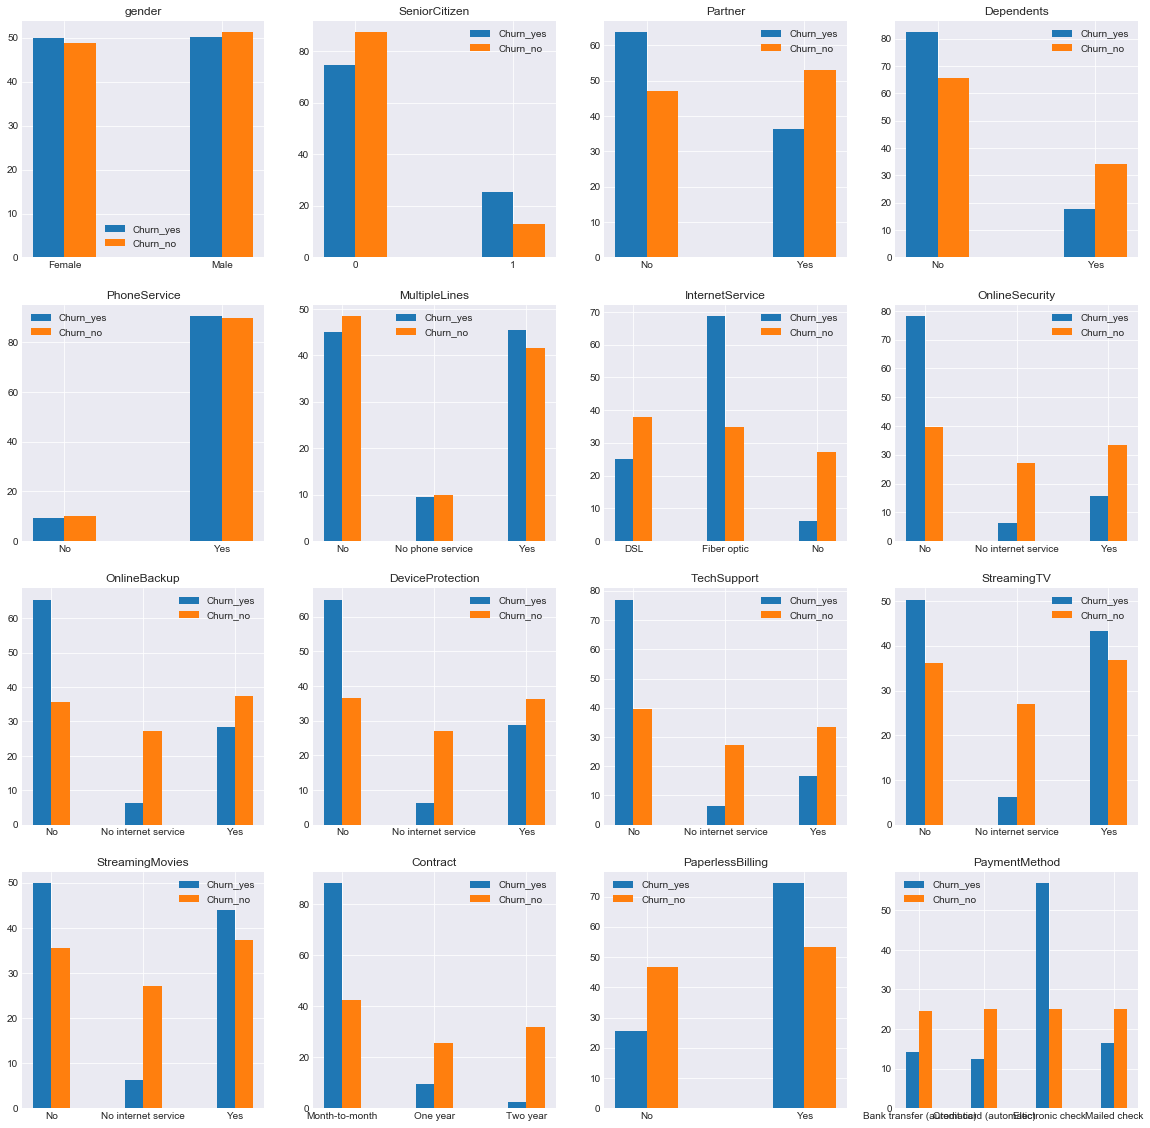

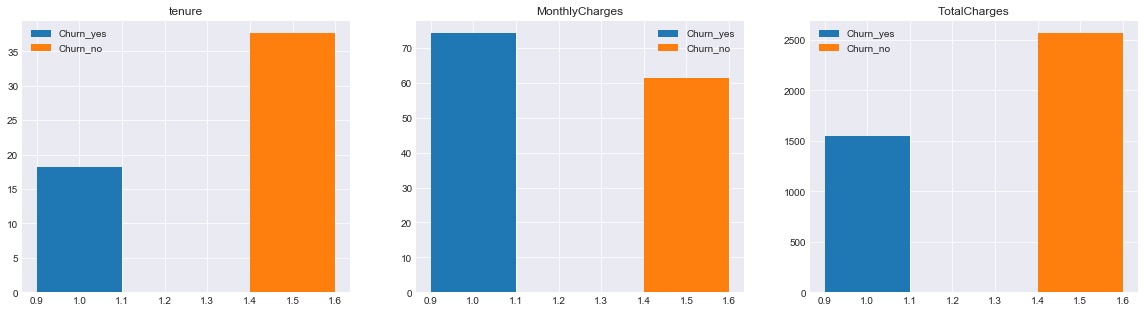

In [40]:
churn_yes = dataset_telecom_users['Churn'] == 'Yes'
churn_no = dataset_telecom_users['Churn'] == 'No'
number_columns = ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']
dataset_columns = dataset_telecom_users.drop(number_columns,  axis=1).columns

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax, i in zip(axes.ravel(), dataset_columns):
    
    x_yes = dataset_telecom_users.groupby(['Churn', i])[i].count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(i).values[1]
    
    x_no = dataset_telecom_users.groupby(['Churn', i])[i].count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(i).values[0]

    ind = np.arange(len(x_yes))  
    width = 0.20  

    ax.bar(ind - width/2, x_yes, width, label='Churn_yes')
    ax.bar(ind + width/2, x_no, width, label='Churn_no')
    ax.set_title(i)
    ax.set_xticks(ind)
    ax.set_xticklabels(dataset_telecom_users.groupby(['Churn', i])[i].count()\
                             .groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(i).keys())
    ax.legend()

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for ax, b in zip(axes.ravel(), dataset_telecom_users[number_columns].columns[1:4]):
    x_yes = dataset_telecom_users[churn_yes][b].mean()
    x_no = dataset_telecom_users[churn_no][b].mean()
    ind = np.arange(len(np.array([x_yes])))
    a = list(dataset_telecom_users[number_columns].columns[1:4]).index(b)
    ax.bar(x=1, height = x_yes, width=width, label='Churn_yes')
    ax.bar(x=1.5, height = x_no, width=width, label='Churn_no')
    ax.set_title(b)
    ax.legend()
plt.show()

Поскольку данные имеют процентное (для типа **объект**) и среднее значение (для типа **числовое**), необходимо выявить столбца, у которых сильно заметна разница между данными где был отток и где не было.

### На основе данных таблиц можно сделать выводы:

1. **Гендерные и семейные различия** пользователей примерно одинаковы, на отток пользователей эти позиции слабо влияют.
2. Тоже самое можно сказать про позиции касательно **телефонных сервисов**, их процентное значение практически идентично.
3. Еще можно отметить слабое влияние показателя **MonthlyCharges**.
4. Первая группа показателей, которые заметно различаются - это интернет сервисы. Самая большая разница проявляется в услугах - **OnlineSecurity и TechSupport**. Их меньше всего подключали, при том, что Интернет-соединение было.
5. Следующей показатель, который сильно разнится, **тип контракта (Contract)**. Основная часть пользователей, кто со временем ушел, пользовались ежемесячным типом оплаты. Тех, у кого двух летний тип оплаты, практически не меняли сервис.

### Для выявления взаимосвязей, можно построить таблицу корреляции признаков.

Подготовим данные, переведем их в числовой формат.

In [45]:
dataset_telecom_users_corr = dataset_telecom_users.copy()

# выбираем необходимые столбцы для форматирования данных
yes_no_other = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 
                'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# меняем данные в столбцах на числовые
dataset_telecom_users_corr[yes_no_other] = dataset_telecom_users_corr[yes_no_other]\
.applymap(lambda x: 0 if x == 'No' else (1 if x == 'Yes' else -1))

# меняем данные в столбцах на числовые
dataset_telecom_users_corr['gender'] = dataset_telecom_users_corr['gender']\
    .apply(lambda x: 1 if x == 'Male' else 0 )

dataset_telecom_users_corr['InternetService'] = dataset_telecom_users_corr['InternetService']\
    .apply(lambda x: 0 if x == 'No' else (1 if x == 'Fiber optic' else 2))

dataset_telecom_users_corr['Contract'] = dataset_telecom_users_corr['Contract']\
    .apply(lambda x: 0 if x == 'Month-to-month' else (1 if x == 'Two year' else 2))

dataset_telecom_users_corr['PaymentMethod'] = dataset_telecom_users_corr['PaymentMethod']\
    .apply(lambda x: 0 if x == 'Electronic check' else 
       (1 if x == 'Mailed check' else 
        (2 if x == 'Bank transfer (automatic)' else 3)))

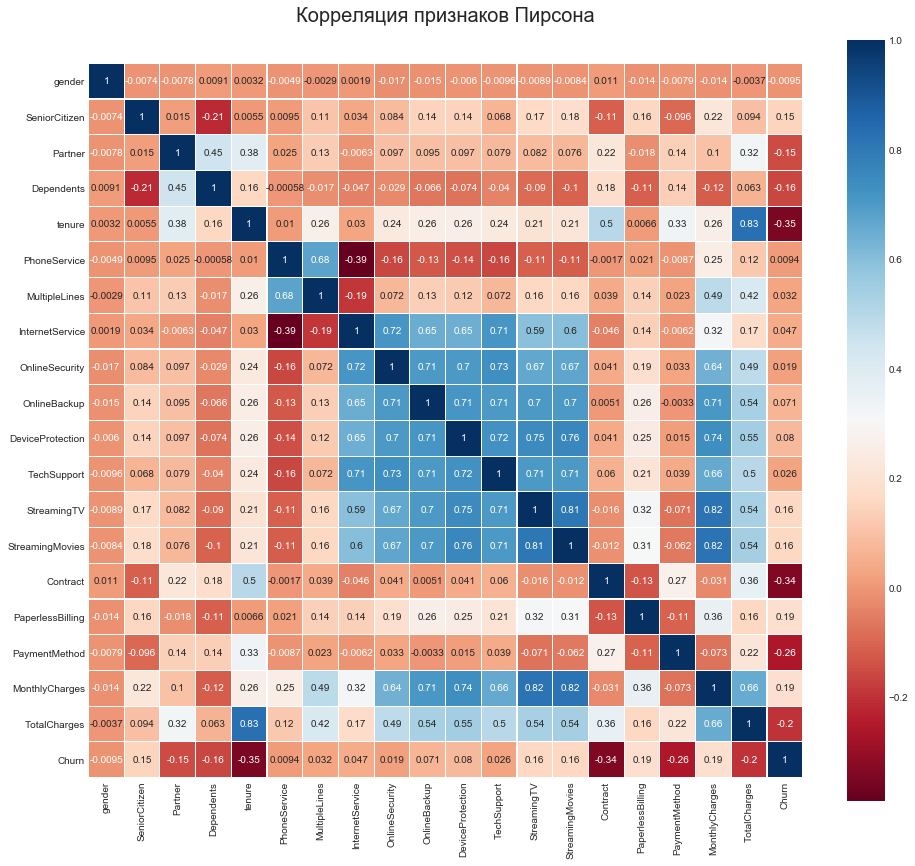

In [46]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Корреляция признаков Пирсона', y=1.05, size=20)
sns.heatmap(dataset_telecom_users_corr.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

При построении таблицы корреляции, можно логичные взаимосвязи:
- подключение телефонии с услугами телефонии
- подключение интернет провайдера с интернет услугами и количеством оплат
- количество месяцев, когда пользователь являлся клиентом фирмы и общая оплаченная им сумма

Прямой корреляции с оттоком пользователей не выявлено. Будем полагаться на выявленные взаимосвязи по предыдущим таблицам.

На основе этих взаимосвязей, необходимо выделить пользователей, кто с меньшей вероятностью планирует уходить. В нашем случаи это пользователь у кого **контракт** более чем на месяц и если есть подключение к интернету, он использует сервисы **OnlineSecurity и TechSupport**.

# 3. Построение моделей для прогнозирования оттока

Для построения необходимых моделей необходимо подготовить датасет. Вп ервую очередь, переведем текстовую информацию в цифровой вид.

In [13]:
# необходимые столбцы для редактирования

feature = ['gender', 'Partner', 'Dependents', 'PhoneService',
           'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod', 'Churn']

dataset_telecom_users_numeric = pd.get_dummies(dataset_telecom_users, columns=feature)
dataset_telecom_users_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,72,24.10,1734.65,0,1,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0
1,0,44,88.15,3973.20,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,1,38,74.95,2869.85,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3,0,4,55.90,238.50,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,0,2,53.45,119.50,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [14]:
# делаем выборку пользователей кто не должен уйти в ближайшее время

predict_churn_no = dataset_telecom_users_numeric[(dataset_telecom_users_numeric['Contract_Month-to-month'] != 1)\
                 & (dataset_telecom_users_numeric['OnlineSecurity_No'] != 1)\
                 & (dataset_telecom_users_numeric['TechSupport_No'] != 1)                        
                         ]

predict_churn_no[['Churn_Yes', 'Churn_No']].sum()

Churn_Yes      59
Churn_No     1557
dtype: int64

Как мы видим, данные критерии отбора нашли **1557** подходящих пользователей и всего **59** не подходящих. Для обучения модели их тоже лучше не брать.

In [15]:
predict_churn_no = predict_churn_no[predict_churn_no['Churn_No'] == 1]

Теперь подготовим общий датасет для обучения моделей. Нужно выбрать найденных пользователей и тех, кто ушел. Их количество должно быть одинаково.

In [16]:
dataset_churn_yes = dataset_telecom_users_numeric[dataset_telecom_users_numeric['Churn_Yes'] == 1][:1557]
                                
train_dataset_full = pd.concat([dataset_churn_yes, predict_churn_no])
train_dataset_full.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
2,1,38,74.95,2869.85,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
11,0,30,51.20,1561.50,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
18,0,42,94.20,4186.30,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
19,0,14,46.35,667.70,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
23,0,32,96.20,3183.40,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


Делим данные на **Х (features)** и **Y (target).

In [17]:
X = train_dataset_full.drop(['Churn_Yes', 'Churn_No'], axis=1)
Y = train_dataset_full['Churn_Yes']

Разбиваем данные на тренировочные и тестовые.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=17) 

Тренируем необходимые модели.

In [19]:
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
nb = GaussianNB().fit(x_train, y_train)
clf = LogisticRegression(random_state=17).fit(x_train, y_train)
dtc = DecisionTreeClassifier(random_state=17).fit(x_train, y_train)

C:\Users\mi.pro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 4. Сравнение качества моделей 

Делаем предсказания и сравниваем качество моделей.

In [27]:
knn_predictions = knn.predict(x_test)
knn_proba = knn.fit(x_train, y_train).predict_proba(x_test)

knn_recall = recall_score(y_test, knn_predictions)
knn_roc_auc_score = roc_auc_score(y_test, knn_proba[:, 1])

accuracy = accuracy_score(knn_predictions, y_test)
print(f'Accuracy: {accuracy}\nknn_recall: {knn_recall}\nknn_roc_auc_score: {knn_roc_auc_score}')

Accuracy: 0.8305519897304237
knn_recall: 0.8227513227513228
knn_roc_auc_score: 0.8977490137091133


In [28]:
nb_predictions = nb.predict(x_test)
nb_proba = knn.fit(x_train, y_train).predict_proba(x_test)

nb_recall = recall_score(y_test, nb_predictions)
nb_roc_auc_score = roc_auc_score(y_test, nb_proba[:, 1])

accuracy = accuracy_score(nb_predictions, y_test)
print(f'Accuracy: {accuracy}\nnb_recall: {nb_recall}\nnb_roc_auc_score : {nb_roc_auc_score}')

Accuracy: 0.9717586649550706
nb_recall: 0.9576719576719577
nb_roc_auc_score : 0.8977490137091133


In [29]:
dtc_predictions = dtc.predict(x_test)
dtc_proba = dtc.fit(x_train, y_train).predict_proba(x_test)

dtc_recall = recall_score(y_test, dtc_predictions)
dtc_roc_auc_score = roc_auc_score(y_test, dtc_proba[:, 1])

accuracy = accuracy_score(dtc_predictions, y_test)
print(f'Accuracy: {accuracy}\ndtc_recall: {dtc_recall}\ndtc_roc_auc_score: {dtc_roc_auc_score}')

Accuracy: 0.9589216944801027
dtc_recall: 0.9603174603174603
dtc_roc_auc_score: 0.9589617226774334


In [30]:
clf_predictions = clf.predict(x_test)
clf_proba = clf.fit(x_train, y_train).predict_proba(x_test)

clf_recall = recall_score(y_test, clf_predictions)
clf_roc_auc_score = roc_auc_score(y_test, clf_proba[:, 1])

accuracy = accuracy_score(clf_predictions, y_test)
print(f'Accuracy: {accuracy}\nclf_recall: {clf_recall}\nclf_roc_auc_score: {clf_roc_auc_score}')

Accuracy: 0.9691912708600771
clf_recall: 0.9444444444444444
clf_roc_auc_score: 0.9857037300927575


C:\Users\mi.pro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Выводы проверки качества моделей

- Все модели показывают высокий уровень качества. Единственно, метод **Ближайших соседей (KNeighborsClassifier)** результат чуть хуже остальных.
- В данном случаи лучшем вариантом будет модель **LogisticRegression**. Она имеет хорошие показатели качества и имеет возможность немного отходить от жестких правил отбора.